<div style="border: 1px solid black">
<b><center><font size="4">Big Data</font></center></b>

<b><center><font size="3">Big Data Strategies</font></center></b>

<b><center><font size="2">3 - Databases</font></center></b>
</div>

**Notebook Developed by**: [Ricardo Campos](https://www.di.ubi.pt/~rcampos)<br>
**email:**  ricardo.campos@ubi.pt<br>
**Affiliation:** *Assistant Professor* @ [University of Beira Interior](http://www.ubi.pt);
*Researcher* @ [LIAAD](https://www.inesctec.pt/en/centres/liaad)-[INESC TEC](https://www.inesctec.pt/en)

<hr>

<p><a href="3-Databases.ipynb" title="Download Notebook" download><img src="https://www.di.ubi.pt/~rcampos/assets/img_tutorials/download.jpg" align = "left" width="50" height="50" alt="Download Notebook"></a></p>
<p>&nbsp;</p>
<p>&nbsp;</p>

<hr>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQLite-Databases" data-toc-modified-id="SQLite-Databases-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SQLite Databases</a></span></li></ul></div>

# Databases <a class="tocSkip">

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## Objetivos de aprendizagem  <a class="tocSkip">
    
No final deste notebook o aluno deverá saber usar bases de dados como forma de lidar com ficheiros de elevadas dimensões.


## Learning Objectives  <a class="tocSkip">
       
When concluding this notebook, the student should know how to use databases as a means to handle big data files.</div>

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

## Sumário  <a class="tocSkip">
### Bases de Dados<a class="tocSkip">

Introdução dos alunos à utilização de bases de dados SQLite para o processamento de elevados volumes de dados
    
## Class Summary  <a class="tocSkip">
### Databases <a class="tocSkip">
Introducing students to SQLite databases to handle big data files
    
</div>

## SQLite Databases

Parte desta seção teve por base o seguinte artigo: https://towardsdatascience.com/loading-large-datasets-in-pandas-11bdddd36f7b

Conforme discutido anteriormente, o carregamento de ficheiros com um elevado volume de dados traz significativos desafios relacionados com o consumo de memória RAM. Na box seguinte importamos o ficheiro `yellow_tripdata_2016-03.csv` (https://www.kaggle.com/datasets/bharath150/taxi-data?select=yellow_tripdata_2016-03.csv) e com ele a reserva/uso de uma significativa quantidade de memória RAM. 

In [ ]:
import pandas as pd

taxi = pd.read_csv('data/yellow_tripdata_2016-03.csv')
#taxi = pd.read_csv('f:\O meu disco\data\BigData\yellow_taxi_data\yellow_tripdata_2016-03.csv')

A obtenção de dados a partir do dataframe é bastante rápida, mas o facto de termos importado e de mantermos o dataframe em memória impacta necessariamente os recursos da máquina, podendo em última instância gerar um "Out of memory error".

In [ ]:
taxi[(taxi['passenger_count']<5) & (taxi['trip_distance'] > 10)]

Note que a importação do ficheiro .csv para memória encontra-se atualmente com um impacto próximo dos 2.5GB.

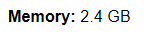

Uma alternativa passa por recorrer ao uso de bases de dados relacionais. Nesta seção discutimos o uso do sqlite e a sua relação com dataframes. Antes de prosseguir faça um restart kernel para "zerar" a utilização de memória do seu notebook. 

O `sqlite` é uma base de dados relacional que corre localmente no seu PC (ao invés de correr num servidor remoto). Ao invés da maioria das bases de dados relacionais, o `sqlite` não tem "server process" separado. Cada base de dados é guardada em disco num único ficheiro com extensão dbw e o `SQLite` lê e escreve diretamente nesse ficheiro. Por norma o ficheiro fica localizado na área de trabalho do jupyter notebook de execução.

Primeiro começamos por importar a biblioteca slqlite3.

In [ ]:
import sqlite3 as sql
import pandas as pd

Posteriormente criamos e estabelecemos comunicação a uma base de dados nova.

In [ ]:
#conn = sql.connect('data/taxi.db')
conn = sql.connect('f:/O meu disco/data/BigData/yellow_taxi_data/data/taxi.db')

A passagem do dataframe para a base de dados pode ser feita com recurso ao seguinte código:
```
taxi.to_sql('taxi', conn)
```

A passagem do dataframe como um todo pode no entanto levar à geração de um `out of memory error`. Para evitar esse tipo de problemas podemos recorrer a chunks. O código abaixo exemplifica a leitura de chunks a partir do ficheiro csv e a sua passagem para a base de dados. Cada chunk corresponde a 50k linhas. No código é também possível observar a criação da tabela "taxi".

In [ ]:
chunk_size=50000
batch_no=1
#for chunk in pd.read_csv('data/yellow_tripdata_2016-03.csv',chunksize=chunk_size,iterator=True):
for chunk in pd.read_csv('f:\O meu disco\data\BigData\yellow_taxi_data\yellow_tripdata_2016-03.csv',chunksize=chunk_size,iterator=True):
    chunk.to_sql('taxi',conn, if_exists='append')
    batch_no+=1
    print('index: {}'.format(batch_no))

Posteriormente, podemos recorrer a código SQL para ler os dados a partir da base de dados. Naturalmente o ficheiro da base de dados encontra-se guardado no disco e o jupyter notebook acabará por importar apenas o resultado da query, levando a uma menor ocupação da memória RAM.

In [ ]:
import pandas as pd
taxi = pd.read_sql('SELECT * FROM taxi WHERE passenger_count <5 AND trip_distance > 10', conn)
taxi.head()

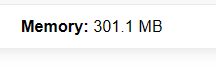

Se pretender ver as últimas 5 linhas pode efetuar um `tail`

In [ ]:
taxi.tail()